
# Modelo de Clasificación de FakeNews utilizando Técnicas no supervisadas.

## Integrantes:
- Eduardo Puraivan <eduardo.puraivan@postgrado.uv.cl>.
- Eduardo Godoy <eduardo.godoy@postgrado.uv.cl>.

## Profesor:
- Rodrigo Salas.

## Asignatura:
- Mineria de Datos.

## Repositorio: 
- [GitHub](https://github.com/EdGoll/classificador-fakenews.git)

### Programas de Doctorado en Informátca Aplicada
### Escuela de Ingenieria Civil Informática.
### Universidad de Valparaíso, Chile.

In [519]:
print(__doc__)

# Code source: Gaël Varoquaux
# License: BSD 3 clause
import time
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from random import randint, uniform,random
from sklearn import decomposition
from sklearn import datasets
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from textblob import TextBlob
%matplotlib inline

colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmykbgrcmykbgrcmyk'])

Automatically created module for IPython interactive environment


In [448]:
df = pd.read_excel("dataset/HILab-Fake_News_Detection_For_Hong_Kong_Tweets.xlsx")

In [449]:
#centers = [[1, 1], [-1, -1]]
#df["verify"] = addVerifyColumn(df)
#df["user_image"] = addUserImage(df)
#df["url_from"] = findUrlFrom(df)
#df["polarity"] = addSentimentFromTweet(df)
#df["subjectibity"] = addSubjectibityFromTweet(df)
df=df.drop(columns=['tweet_text'])
df

,user_id,follower_count,following_count,like_count,retweet_count,Num_Syllables,id,Avg_Syllables,Avg_Words_in_Sentences,Flesh-Kincaid,Num_Big_words,Num_Long_Sentences,Num_Sentences,Num_Short_Sentences,Num_Urls,Num_words,Rate_Adv_adj,class
0,4.871190e+08,12616791,61,28,7,41,1,1.782609,22.000000,14.414783,6,0,1,0,1,23,0.043478,real
1,4.871190e+08,12616791,61,28,3,42,2,2.210526,18.000000,17.904211,8,0,1,0,1,19,0.052632,real
2,4.871190e+08,12616791,61,64,19,43,3,2.047619,20.000000,16.761905,6,0,1,0,1,21,0.095238,real
3,4.871190e+08,12616791,61,60,17,34,4,1.789474,18.000000,12.935789,6,0,1,0,1,19,0.105263,real
4,4.871190e+08,12616791,61,47,10,42,5,2.000000,10.000000,12105.000000,8,0,2,1,1,21,0.142857,real
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2361,2.147484e+09,14895,9883,6,1,99,268,3.000000,10.666667,24.100000,12,0,3,1,1,33,0.181818,fake
2362,2.147484e+09,14895,9883,0,0,63,269,3.000000,10.500000,23905.000000,6,0,2,1,0,21,0.142857,fake
2363,NaN,4500,1215,0,0,42,270,3.000000,13.000000,25.270000,1,0,1,0,1,14,0.000000,fake
2364,2.147484e+09,14895,9883,1,0,102,271,3.000000,11.333333,24.230000,9,0,3,1,0,34,0.088235,fake


# PCA con todas las componentes del data set

In [450]:
numComponentes=16
encoder = LabelEncoder()
df['class'] = encoder.fit_transform(df['class'].values)
df["user_id"] = df["user_id"].fillna(0)
#df_rs=df.drop(columns=['class'])

In [451]:
#print(df)
#print (len(df.columns))

In [456]:
dataset = df

X=dataset
escala=MinMaxScaler()
escala.fit(X)
escalada=escala.transform(X)

#X = transformada
pca = decomposition.PCA(n_components=numComponentes)
pca.fit(escalada)
X = pca.transform(escalada)

In [457]:
# Varianza total explicada (valores propios)
valores_propios = pca.explained_variance_ 
# Varianza proporcional explicada
var_ratio = pca.explained_variance_ratio_

print(valores_propios)
print(var_ratio)

[0.14655225 0.08973934 0.07514524 0.05260672 0.03171928 0.02245306
 0.02048109 0.01421571 0.01028958 0.00697933 0.00547695 0.00445948
 0.00340194 0.00293761 0.0026752  0.00219857]
[0.29738944 0.1821025  0.1524876  0.10675158 0.06436598 0.04556261
 0.04156102 0.02884706 0.02088002 0.01416273 0.01111403 0.00904935
 0.00690334 0.0059611  0.00542861 0.00446143]


''

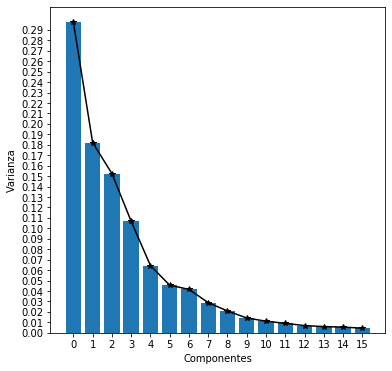

In [458]:
yE = np.arange(0, max(var_ratio), 0.01)
xE = np.arange(0, len(var_ratio), 1)

fig, ax1 = plt.subplots(figsize = (6,6))
chart=ax1.bar(np.arange(numComponentes), var_ratio, width=0.8, align = 'center' )

plt.plot(np.arange(numComponentes), var_ratio,'-*k')

ax1.set_yticks(yE)
ax1.set_xticks(xE)
ax1.set_xlabel('Componentes')
ax1.set_ylabel('Varianza')
;


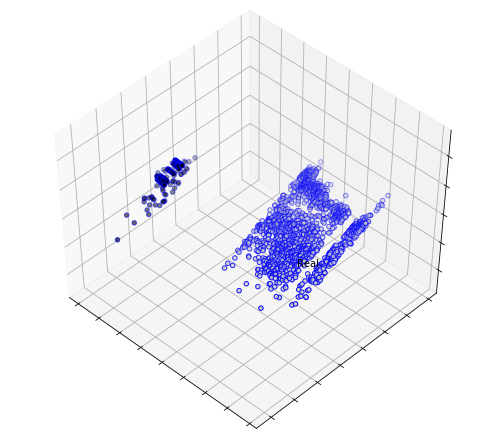

In [459]:
#X = dataset.values
#y = y.values
#print (X)
#print (y)
fig = plt.figure(1, figsize=(7, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Fake', 0),('Real', 1)]:
    ax.text3D(
              X[y == label, 1].mean(),
              X[y == label, 1].mean() ,
              X[y == label, 1].mean(), 
              name,
              #horizontalalignment='center',
             # bbox=dict(alpha=.5, edgecolor='w', facecolor='r')
    )
# Reorder the labels to have colors matching the cluster results
#y = np.choose(y, [0, 1,2]).astype(np.float)
ax.scatter(X[:, 0], X[:,1], c=y, cmap=plt.cm.nipy_spectral, edgecolor='b', facecolor='w')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()
#

Text(0, 0.5, 'PCA 2')

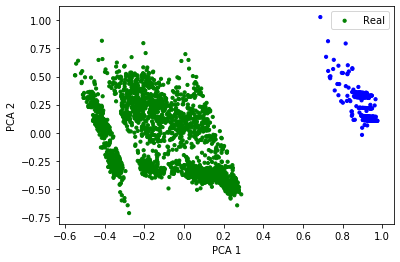

In [460]:
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)
Y=y.astype(int)
plt.scatter(transformada[:,0],transformada[:,1], color=colors[Y].tolist(), s=10)
plt.legend(["Real","fake"], loc='best')
plt.gca()
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

PCA nos permite visualizar ciertos agrupamientos en base a las componentes, permitiendo de esta forma poder plantear nuevo elemento de mejora para utilizar el enfoque no supervisado.
Inicialmente se aplicara PCA  a las componentes del modelo según las metodología presentadas en la publicación, en este caso se separar la muestra en dato Literarios y Datos asociados a la red social.

<Figure size 640x480 with 0 Axes>

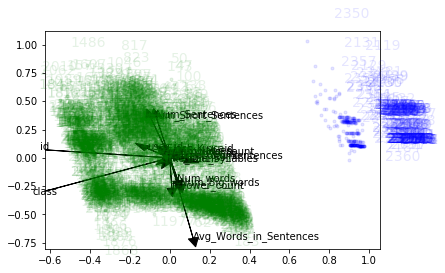

<Figure size 640x480 with 0 Axes>

In [461]:
xvector = pca.components_[0] # Vector de la componente principal 1
yvector = pca.components_[1] # Vector de la componente principal 2
xs = transformada[:,0]
ys = transformada[:,1]

for i in range(len(xvector)):
    plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys),
              color='k', width=0.0005, head_width=0.05)
    plt.text(xvector[i]*max(xs), yvector[i]*max(ys),
             list(df.columns.values)[i], color='k')
colores = 'bgy'
for i in range(len(xs)):
    plt.plot(xs[i], ys[i], colores[Y[i]]+'.', alpha = 0.1)
    plt.text(xs[i]*1.2, ys[i]*1.2, list(df.index)[i], 
             color=colores[Y[i]],alpha = 0.1, fontsize=14)
    
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

# PCA con modelo de Muestra Literaria

In [462]:
numComponentes=8
df_l=df.iloc[:, :5]
df_l["Num_Urls"]=df["Num_Urls"]
df_l["id"]=df["id"]
df_l["class"]=df["class"]
df_l

,user_id,follower_count,following_count,like_count,retweet_count,Num_Urls,id,class
0,4.871190e+08,12616791,61,28,7,1,1,1
1,4.871190e+08,12616791,61,28,3,1,2,1
2,4.871190e+08,12616791,61,64,19,1,3,1
3,4.871190e+08,12616791,61,60,17,1,4,1
4,4.871190e+08,12616791,61,47,10,1,5,1
...,...,...,...,...,...,...,...,...
2361,2.147484e+09,14895,9883,6,1,1,268,0
2362,2.147484e+09,14895,9883,0,0,0,269,0
2363,0.000000e+00,4500,1215,0,0,1,270,0
2364,2.147484e+09,14895,9883,1,0,0,271,0


''

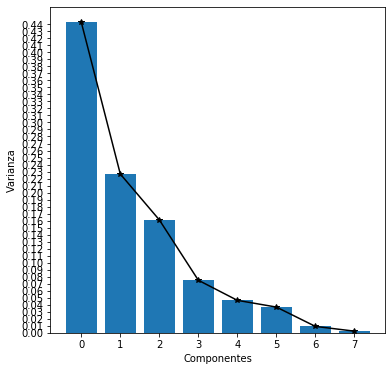

In [463]:
dataset = df_l
X=dataset
escala=MinMaxScaler()
escala.fit(X)
escalada=escala.transform(X)

#X = transformada
pca = decomposition.PCA(n_components=numComponentes)
pca.fit(escalada)
X = pca.transform(escalada)
# Varianza total explicada (valores propios)
valores_propios = pca.explained_variance_ 
# Varianza proporcional explicada
var_ratio = pca.explained_variance_ratio_
yE = np.arange(0, max(var_ratio), 0.01)
xE = np.arange(0, len(var_ratio), 1)

fig, ax1 = plt.subplots(figsize = (6,6))
chart=ax1.bar(np.arange(numComponentes), var_ratio, width=0.8, align = 'center' )

plt.plot(np.arange(numComponentes), var_ratio,'-*k')

ax1.set_yticks(yE)
ax1.set_xticks(xE)
ax1.set_xlabel('Componentes')
ax1.set_ylabel('Varianza')
;

Text(0, 0.5, 'PCA 2')

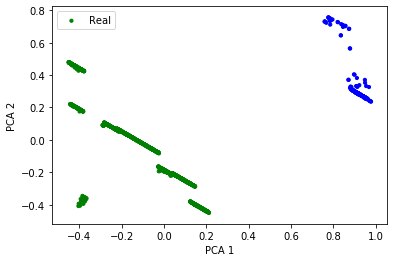

In [464]:
colors = np.hstack([colors] * 20)
Y=y.astype(int)
plt.scatter(X[:,0],X[:,1], color=colors[Y].tolist(), s=10)
plt.legend(["Real","fake"], loc='best')
plt.gca()
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [ ]:
El algoritmo por sigue detectando laraciones, pero su representación no se ve clara. con respecto a la totalidad compoenentes 

# PCA con Modelo de muestra basada en Componentes de Red Social

In [465]:
numComponentes = 11
df_rs = df.iloc[:, 6:18]
df_rs=df_rs.drop(columns=['Num_Urls'])
#df_rs=df_rs.drop(columns=['class'])
df_rs

,id,Avg_Syllables,Avg_Words_in_Sentences,Flesh-Kincaid,Num_Big_words,Num_Long_Sentences,Num_Sentences,Num_Short_Sentences,Num_words,Rate_Adv_adj,class
0,1,1.782609,22.000000,14.414783,6,0,1,0,23,0.043478,1
1,2,2.210526,18.000000,17.904211,8,0,1,0,19,0.052632,1
2,3,2.047619,20.000000,16.761905,6,0,1,0,21,0.095238,1
3,4,1.789474,18.000000,12.935789,6,0,1,0,19,0.105263,1
4,5,2.000000,10.000000,12105.000000,8,0,2,1,21,0.142857,1
...,...,...,...,...,...,...,...,...,...,...,...
2361,268,3.000000,10.666667,24.100000,12,0,3,1,33,0.181818,0
2362,269,3.000000,10.500000,23905.000000,6,0,2,1,21,0.142857,0
2363,270,3.000000,13.000000,25.270000,1,0,1,0,14,0.000000,0
2364,271,3.000000,11.333333,24.230000,9,0,3,1,34,0.088235,0


''

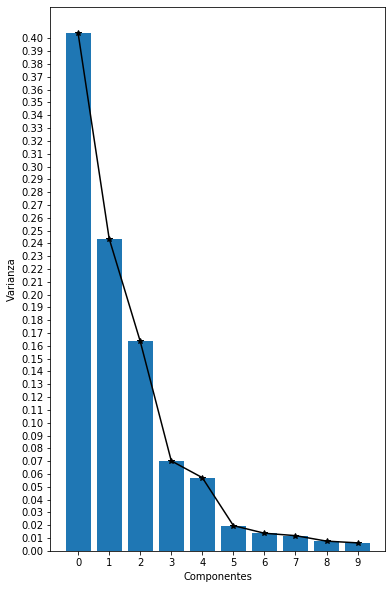

In [466]:
dataset = df_rs
X=dataset
escala=MinMaxScaler()
escala.fit(X)
escalada=escala.transform(X)

pca = decomposition.PCA(n_components=10)
pca.fit(escalada)
X = pca.transform(escalada)
# Varianza total explicada (valores propios)
valores_propios = pca.explained_variance_ 
# Varianza proporcional explicada
var_ratio = pca.explained_variance_ratio_
yE = np.arange(0, max(var_ratio), 0.01)
xE = np.arange(0, len(var_ratio), 1)

fig, ax1 = plt.subplots(figsize = (6,10))
chart=ax1.bar(np.arange(10), var_ratio, width=0.8, align = 'center' )

plt.plot(np.arange(10), var_ratio,'-*k')

ax1.set_yticks(yE)
ax1.set_xticks(xE)
ax1.set_xlabel('Componentes')
ax1.set_ylabel('Varianza')
;

Text(0, 0.5, 'PCA 2')

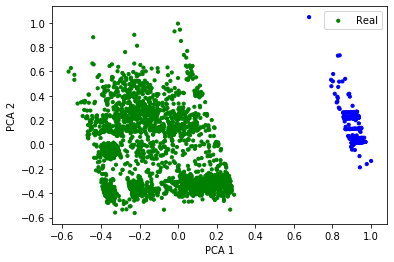

In [467]:
colors = np.hstack([colors] * 20)
Y=y.astype(int)
plt.scatter(X[:,0],X[:,1], color=colors[Y].tolist(), s=10)
plt.legend(["Real","fake"], loc='best')
plt.gca()
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [ ]:
Se puede comentar que la separación no aporta un real valor a lo ya observado en la sección inicial. 

# Propuesta de mejora:
## Se enriquece Data-Set con nuevas componentes como propuesta de mejora al modelo.
## Se agregan como caso de estudios: 
- Existencia de URL dentro de texto del Tweet.
- Se agrega comprobación de Cuenta Verificada y existencia de  imagen de perfil.
- Se aplica analisis de Sentimiento y polaridad a cada noticia.


In [525]:
#Busca url en el contenido del twitter
def findUrlFrom(df):
    url_from=[]    
    for word in df["tweet_text"]:            
        if(re.search("(?P<url>https?://[^\s]+)", word)):
            url_from.append(1)
        else:
            url_from.append(0) 
    return url_from

#Se genera Dato sintetico de cuenta verificada.
def addVerifyColumn(df):
    verify = []
    for i in range(len(df["id"])):
        if(i<2094):
            verify.append(1)
        else:
            verify.append(randint(0,1))
    
    return (verify)

#Se genera Dato sintetico de imagen de perfil.
def addUserImage(df):
    user_image = []
    for i in range(len(df["id"])):
        if(i<2094):
            user_image.append(1)
        else:
            user_image.append(randint(0,1))
    
    return (user_image)   

#Analisis de Sentimiento
def addSentimentFromTweet(df):
    polaridad = df["tweet_text"].apply(lambda x: TextBlob(x).sentiment.polarity)
    return polaridad

#Analisis de Subjetividad
def addSubjectibityFromTweet(df):
    subjetividad = df["tweet_text"].apply(lambda x: TextBlob(x).sentiment.subjectivity)
    return subjetividad


In [469]:
df = pd.read_excel("dataset/HILab-Fake_News_Detection_For_Hong_Kong_Tweets.xlsx")

In [470]:
df["verify"] = addVerifyColumn(df)
df["user_image"] = addUserImage(df)
df["url_from"] = findUrlFrom(df)
df["polarity"] = addSentimentFromTweet(df)
df["subjectibity"] = addSubjectibityFromTweet(df)
df=df.drop(columns=['tweet_text'])
encoder = LabelEncoder()
df['class'] = encoder.fit_transform(df['class'].values)
df["user_id"] = df["user_id"].fillna(0)

df

,user_id,follower_count,following_count,like_count,retweet_count,Num_Syllables,id,Avg_Syllables,Avg_Words_in_Sentences,Flesh-Kincaid,...,Num_Short_Sentences,Num_Urls,Num_words,Rate_Adv_adj,class,verify,user_image,url_from,polarity,subjectibity
0,4.871190e+08,12616791,61,28,7,41,1,1.782609,22.000000,14.414783,...,0,1,23,0.043478,1,1,1,1,0.033333,0.066667
1,4.871190e+08,12616791,61,28,3,42,2,2.210526,18.000000,17.904211,...,0,1,19,0.052632,1,1,1,1,0.000000,0.000000
2,4.871190e+08,12616791,61,64,19,43,3,2.047619,20.000000,16.761905,...,0,1,21,0.095238,1,1,1,1,0.000000,0.100000
3,4.871190e+08,12616791,61,60,17,34,4,1.789474,18.000000,12.935789,...,0,1,19,0.105263,1,1,1,1,0.000000,0.187500
4,4.871190e+08,12616791,61,47,10,42,5,2.000000,10.000000,12105.000000,...,1,1,21,0.142857,1,1,1,1,-0.050000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2361,2.147484e+09,14895,9883,6,1,99,268,3.000000,10.666667,24.100000,...,1,1,33,0.181818,0,0,0,1,0.358333,0.618750
2362,2.147484e+09,14895,9883,0,0,63,269,3.000000,10.500000,23905.000000,...,1,0,21,0.142857,0,1,0,0,0.350000,0.900000
2363,0.000000e+00,4500,1215,0,0,42,270,3.000000,13.000000,25.270000,...,0,1,14,0.000000,0,0,0,1,-0.155556,0.288889
2364,2.147484e+09,14895,9883,1,0,102,271,3.000000,11.333333,24.230000,...,1,0,34,0.088235,0,0,1,0,0.050000,0.550000


''

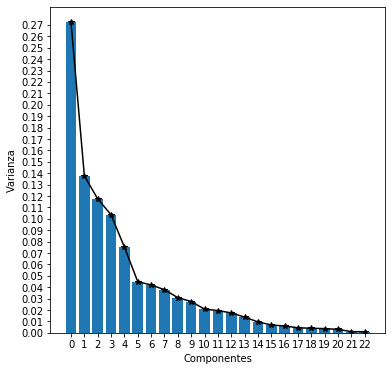

In [471]:
numComponentes=23
dataset = df
X=dataset
escala=MinMaxScaler()
escala.fit(X)
escalada=escala.transform(X)

#X = transformada
pca = decomposition.PCA(n_components=numComponentes)
pca.fit(escalada)
X = pca.transform(escalada)
# Varianza total explicada (valores propios)
valores_propios = pca.explained_variance_ 
# Varianza proporcional explicada
var_ratio = pca.explained_variance_ratio_
yE = np.arange(0, max(var_ratio), 0.01)
xE = np.arange(0, len(var_ratio), 1)

fig, ax1 = plt.subplots(figsize = (6,6))
chart=ax1.bar(np.arange(numComponentes), var_ratio, width=0.8, align = 'center' )

plt.plot(np.arange(numComponentes), var_ratio,'-*k')

ax1.set_yticks(yE)
ax1.set_xticks(xE)
ax1.set_xlabel('Componentes')
ax1.set_ylabel('Varianza')
;

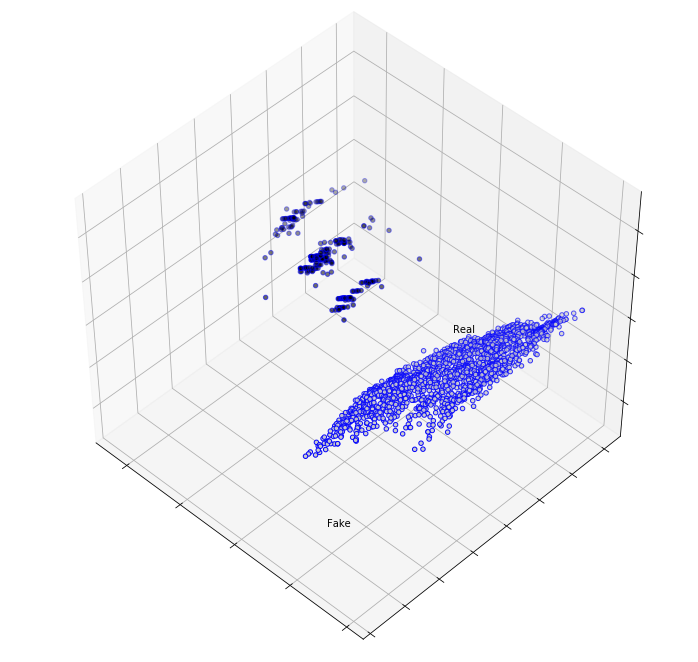

In [472]:
fig = plt.figure(1, figsize=(10, 9))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Fake', 0),('Real', 1)]:
    ax.text3D(
              X[y == label, 0].mean(),
              X[y == label, 1].mean(),
              X[y == label, 1].mean(), 
              name,
              #horizontalalignment='center',
             # bbox=dict(alpha=.5, edgecolor='w', facecolor='r')
    )
# Reorder the labels to have colors matching the cluster results
#y = np.choose(y, [0, 1,2]).astype(np.float)
ax.scatter(X[:, 0], X[:,1], c=y, cmap=plt.cm.nipy_spectral, edgecolor='b', facecolor='w')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

Text(0, 0.5, 'PCA 2')

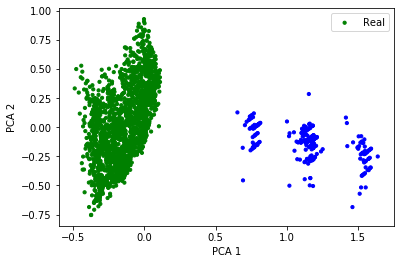

In [473]:
colors = np.hstack([colors] * 20)
Y=y.astype(int)
plt.scatter(X[:,0],X[:,1], color=colors[Y].tolist(), s=10)
plt.legend(["Real","fake"], loc='best')
plt.gca()
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

Se puede aprecia un nuvo comportamiento de la agrupación luego de volver a aplicar PCA al data set enriquecido con amas componentes, permitiendo visualizar mejor agrupaciones por otras características.
Se puede concluir que al agregar las nuevas componentes el modelo fue potenciado

<Figure size 960x800 with 0 Axes>

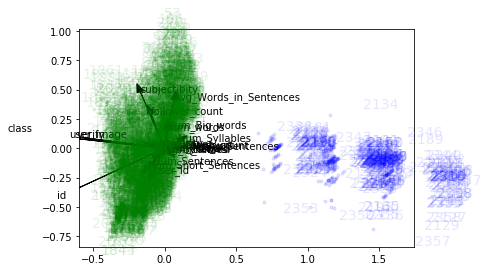

<Figure size 960x800 with 0 Axes>

In [492]:

xvector = pca.components_[0] # Vector de la componente principal 1
yvector = pca.components_[1] # Vector de la componente principal 2
xs = X[:,0]
ys = X[:,1]

for i in range(len(xvector)):
    plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys),
              color='k', width=0.0005, head_width=0.05)
    plt.text(xvector[i]*max(xs), yvector[i]*max(ys),
             list(df.columns.values)[i], color='k')
colores = 'bgy'
for i in range(len(xs)):
    plt.plot(xs[i], ys[i], colores[Y[i]]+'.', alpha = 0.1)
    plt.text(xs[i]*1.2, ys[i]*1.2, list(df.index)[i], 
             color=colores[Y[i]],alpha = 0.1, fontsize=14)
    
from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

## Técnica de Clustering con DBSCAN

Tiempo de Ajuste: 0.18450617790222168


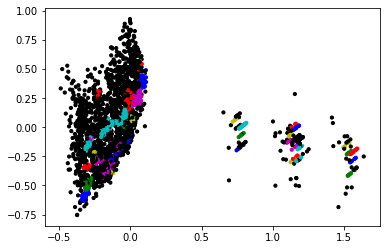

In [530]:
from sklearn import cluster # Técnica de Clustering

algoritmo = cluster.DBSCAN(eps=0.10)

t0 = time.time()
algoritmo.fit(X)
t1 = time.time()
tiempo_ajuste = t1 - t0
print("Tiempo de Ajuste:", tiempo_ajuste)
colors_ = np.hstack([colors] * 20)
y_pred = algoritmo.labels_.astype(np.int)
plt.scatter(X[:, 0], X[:, 1], color=colors_[y_pred].tolist(), s=10)

In [531]:
labels = algoritmo.labels_
labels_true = Y
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.6f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.6f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.6f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.6f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.6f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.6f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 48
Homogeneity: 0.622568
Completeness: 0.131310
V-measure: 0.216877
Adjusted Rand Index: 0.202696
Adjusted Mutual Information: 0.208106
Silhouette Coefficient: -0.191532


## DBSCAN no permite visualizar agrupamiento y se obtienen métricas que permiten visualizar la no correspondencia con el modelo.

# Técnica de Clustering con KMeans

Tiempo de Ajuste: 0.08275604248046875


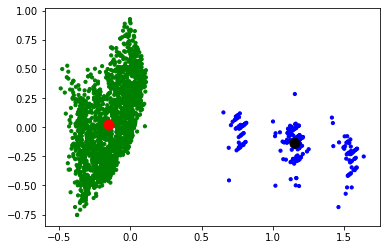

In [558]:
algoritmo = cluster.KMeans(n_clusters=2)
t0 = time.time()
algoritmo.fit(X)
t1 = time.time()
tiempo_ajuste = t1 - t0
print("Tiempo de Ajuste:", tiempo_ajuste)
y_pred = algoritmo.labels_.astype(np.int)
plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred].tolist(), s=10)
centros = algoritmo.cluster_centers_
plt.scatter(centros[:, 0], centros[:, 1], s=100, c=['k','r'])

In [584]:
labels = algoritmo.labels_
labels_true = Y
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.6f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.6f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.6f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.6f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.6f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.6f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 2
Homogeneity: 1.000000
Completeness: 1.000000
V-measure: 1.000000
Adjusted Rand Index: 1.000000
Adjusted Mutual Information: 1.000000
Silhouette Coefficient: 0.450487


## KMeans Permite una visualizar una correcta  formación de clusters con muy buenas metricas de resultado. 
## Su resultado permite ser un candidato a ser utilizado en la implementación final del proyecto.

## Técnica de Clustering con KVecinos

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:245: UserWarning: the number of connected components of the connectivity matrix is 6 > 1. Completing it to avoid stopping the tree early.
  affinity='euclidean')


Tiempo de Ajuste: 0.34004878997802734


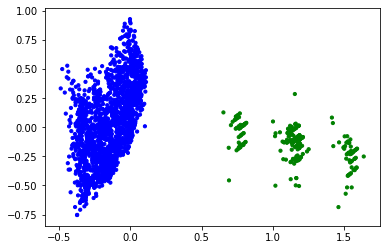

In [559]:
from sklearn.neighbors import kneighbors_graph # Técnica de k-Vecino mas cercano
connectivity = kneighbors_graph(transformada, n_neighbors=10, include_self=False)
algoritmo = cluster.AgglomerativeClustering(n_clusters=2, linkage='ward',
                                           connectivity=connectivity)
t0 = time.time()
algoritmo.fit(X)
t1 = time.time()
tiempo_ajuste = t1 - t0
print("Tiempo de Ajuste:", tiempo_ajuste)
Y = algoritmo.labels_.astype(np.int)
plt.scatter(X[:, 0], X[:, 1], color=colors[Y].tolist(), s=10)

In [560]:
labels = algoritmo.labels_
labels_true = Y
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.6f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.6f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.6f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.6f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.6f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.6f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 2
Homogeneity: 1.000000
Completeness: 1.000000
V-measure: 1.000000
Adjusted Rand Index: 1.000000
Adjusted Mutual Information: 1.000000
Silhouette Coefficient: 0.450487


## De igual forma que el anterior, KVecinos permite una visualizar una correcta  formación de clusters con muy buenas métricas de resultado. 
## Su resultado permite ser otro candidato a ser utilizado en la implementación final del proyecto.


# Sentimiento y Objetividad en Noticias.
- Polaridad = [-1,1] (-1 Noticia muy negativa hasta  1 Noticia muy positiva)
- Subjetividad = [0,1] (0 Noticia con contenido muy objetivo hasta  1 como contenido muy subjetivo )

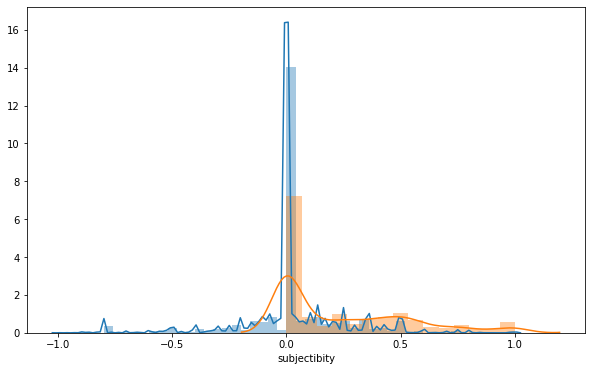

In [561]:
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)

sns.distplot(df["polarity"], ax=ax)
sns.distplot(df["subjectibity"], ax=ax)

## Como información adicional se presenta el grafico de analisís de sentimiento y polaridad con respecto a los tweets noticias contenidos en el DataSEt.
## Donde se puede apreciar lo siguiente:

- La Región azul Representa el sentimiento o polaridad la cual se mantiene en la mayoria de los casos cercano a 0, es decir, neutra. Se logran apreciar noticias con contenido bastante negativo (menores a 0).
- La Región Naranja Representa la Objetividad, ya que se concentra gran parte de la muestra cercano a cero, pero existen tambien tendencias astante marcadas a la subjetividad, lo que podria poner en riesgo el valor real de la noticia relacionada.
- En general la muestra permite ver que el analisis de sensibilidad tiene sentido con la mayor parte de las noticias analizadas, ya que se espera que una noticia sea Objetiva y Neutra en su polaridad.

# Red Neuronal  Utilizando TensoFlow y Keras framework
Se usa keras para definir arquitectura de capa de red neuronal mediante la siguiente definición:

- Hidden layer 1: 5 neurons, ReLU activation
- Hidden layer 2: 2 neurons, ReLU activation
- Output Layer: 1 neuron, Sigmoid activation

In [563]:
from sklearn.model_selection import train_test_split

X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X, Y, test_size=0.3)

In [577]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential([
    Dense(10, activation='relu', input_shape=(23,)),
    Dense(5, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [578]:
hist = model.fit(X_train, Y_train,
          batch_size=64, epochs=100,
          validation_data=(X_train, Y_train))

Epoch 1/100
26/26 [==============================] - 0s 7ms/step - loss: 0.7581 - accuracy: 0.3605 - val_loss: 0.7012 - val_accuracy: 0.6033
Epoch 2/100
26/26 [==============================] - 0s 2ms/step - loss: 0.6676 - accuracy: 0.7107 - val_loss: 0.6367 - val_accuracy: 0.8237
Epoch 3/100
26/26 [==============================] - 0s 2ms/step - loss: 0.6147 - accuracy: 0.8798 - val_loss: 0.5930 - val_accuracy: 0.8937
Epoch 4/100
26/26 [==============================] - 0s 2ms/step - loss: 0.5762 - accuracy: 0.8967 - val_loss: 0.5590 - val_accuracy: 0.8883
Epoch 5/100
26/26 [==============================] - 0s 2ms/step - loss: 0.5452 - accuracy: 0.8877 - val_loss: 0.5310 - val_accuracy: 0.8889
Epoch 6/100
26/26 [==============================] - 0s 2ms/step - loss: 0.5194 - accuracy: 0.8853 - val_loss: 0.5073 - val_accuracy: 0.8865
Epoch 7/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4974 - accuracy: 0.8871 - val_loss: 0.4868 - val_accuracy: 0.8865
Epoch 8/100
2

Epoch 57/100
26/26 [==============================] - 0s 2ms/step - loss: 0.0672 - accuracy: 0.9970 - val_loss: 0.0659 - val_accuracy: 0.9970
Epoch 58/100
26/26 [==============================] - 0s 2ms/step - loss: 0.0649 - accuracy: 0.9970 - val_loss: 0.0637 - val_accuracy: 0.9970
Epoch 59/100
26/26 [==============================] - 0s 2ms/step - loss: 0.0626 - accuracy: 0.9970 - val_loss: 0.0615 - val_accuracy: 0.9970
Epoch 60/100
26/26 [==============================] - 0s 2ms/step - loss: 0.0605 - accuracy: 0.9970 - val_loss: 0.0594 - val_accuracy: 0.9970
Epoch 61/100
26/26 [==============================] - 0s 2ms/step - loss: 0.0585 - accuracy: 0.9970 - val_loss: 0.0574 - val_accuracy: 0.9970
Epoch 62/100
26/26 [==============================] - 0s 2ms/step - loss: 0.0565 - accuracy: 0.9970 - val_loss: 0.0555 - val_accuracy: 0.9976
Epoch 63/100
26/26 [==============================] - 0s 2ms/step - loss: 0.0547 - accuracy: 0.9976 - val_loss: 0.0537 - val_accuracy: 0.9976
Epoch 

In [581]:
model.evaluate(X_val_and_test, Y_val_and_test)


23/23 [==============================] - 0s 997us/step - loss: 0.0192 - accuracy: 1.0000


[0.019248345866799355, 1.0]

In [582]:
model.predict(X_val_and_test)

array([[0.01483577],
       [0.02415738],
       [0.01399642],
       [0.01304561],
       [0.01285145],
       [0.02202371],
       [0.02488005],
       [0.01408476],
       [0.01418093],
       [0.02485648],
       [0.01171458],
       [0.02432224],
       [0.02279493],
       [0.01168203],
       [0.01544857],
       [0.01113182],
       [0.02030322],
       [0.01578549],
       [0.01604238],
       [0.02499685],
       [0.01583263],
       [0.01109728],
       [0.01770905],
       [0.99030006],
       [0.98967373],
       [0.01241526],
       [0.9991015 ],
       [0.93148786],
       [0.02747592],
       [0.02535442],
       [0.00980091],
       [0.01738134],
       [0.98110104],
       [0.02224067],
       [0.01220381],
       [0.9918095 ],
       [0.01013464],
       [0.010423  ],
       [0.01170605],
       [0.02268675],
       [0.01773465],
       [0.02831253],
       [0.02406517],
       [0.0123511 ],
       [0.01429328],
       [0.01588258],
       [0.02579167],
       [0.999